In [ ]:
"""Dataset Info"""

"""
Name of dataset: Data scientist salary

Dataset link: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor

Dataset download: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor/download?datasetVersionNumber=1

License: CC0: Public Domain

Size: data_cleaned_2021.csv is 3.12 MB

"""

In [ ]:
"""
Characteristics of this dataset:

This ROR data was made by scrapping the job postings related to the position of 'Data Scientist' from www.glassdoor.com in USA, it used selenium to scrap the data. After scrapping the raw data, it removed the duplicated rows from it which reduced the records from 1000 to 742. After this, several simplifications were performed to make the data user friendly for further data analysis and modelling.

With each job, it got the following columns: Job title, Salary Estimate, Job Description, Rating, Company, Location, Company , Headquarters, , , any Size, Company Founded Date, Type of Ownership, Industry, Sector, Revenue, Competitors.

Note: Columns with value -1 means either the data scraping was unsuccessful for that or the data was not present.
"""

In [23]:
import pandas as pd
import bqplot
import json
import pandas as pd
import re
import numpy as np
import random
from functools import reduce
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from transformers import BertTokenizer

In [24]:
df = pd.read_csv('data_cleaned_2021.csv')
df[:10]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,...,0,0,0,1,0,1,0,data scientist,na,na
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,...,0,0,0,0,0,0,0,data scientist,na,na
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 - 500,2005,...,1,0,0,0,0,0,0,data scientist,na,M
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+,2014,...,0,0,0,0,0,0,0,other scientist,na,P
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,...,0,0,0,0,0,0,0,data scientist,na,na


In [25]:
# Note that since we are interested in the salary situation, we need to extract and clean the original salary expectation data.
# The new wage expectation obtained is the average of the upper and lower limits of the wage expectation.
for i in range(len(df)):
  txt = df['Salary Estimate'][i]
  matches = re.findall(r'\d+', txt)
  matches = [int(x) for x in matches]
  df['Salary Estimate'][i] = sum(matches) / len(matches)

<ipython-input-25-8f4c4bb01d9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'][i] = sum(matches) / len(matches)
<ipython-input-25-8f4c4bb01d9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'][i] = sum(matches) / len(matches)
<ipython-input-25-8f4c4bb01d9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'][i] = sum(matches) / len(matches)
<ipython-input-25-8f4c4bb01d9f>

In [26]:
df[:10]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
5,5,Data Scientist,95.0,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,...,0,0,0,1,0,1,0,data scientist,na,na
6,6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,...,0,0,0,0,0,0,0,data scientist,na,na
7,7,Data Scientist,114.0,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 - 500,2005,...,1,0,0,0,0,0,0,data scientist,na,M
8,8,Research Scientist,61.0,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+,2014,...,0,0,0,0,0,0,0,other scientist,na,P
9,9,Data Scientist,140.0,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,...,0,0,0,0,0,0,0,data scientist,na,na


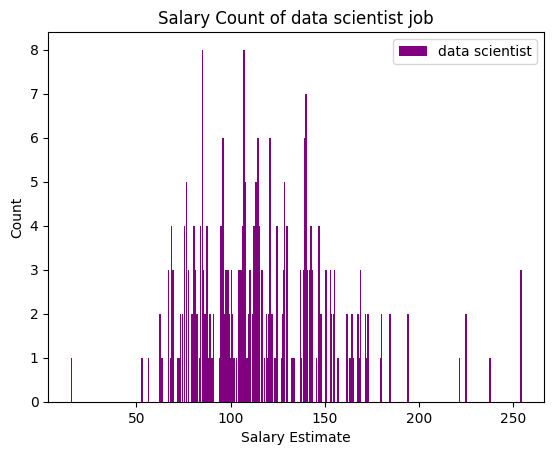

In [27]:
# Chart 1:  the bar chart of the distribution of Salary Count of data scientist job
grouped_data = df.groupby(['Salary Estimate', 'job_title_sim']).size().reset_index(name='count')

data_scientist_data = grouped_data[grouped_data['job_title_sim'] == 'data scientist']

plt.bar(data_scientist_data['Salary Estimate'], data_scientist_data['count'], color='purple', label='data scientist')
plt.xlabel('Salary Estimate')
plt.ylabel('Count')
plt.title('Salary Count of data scientist job')
plt.legend()

plt.show()

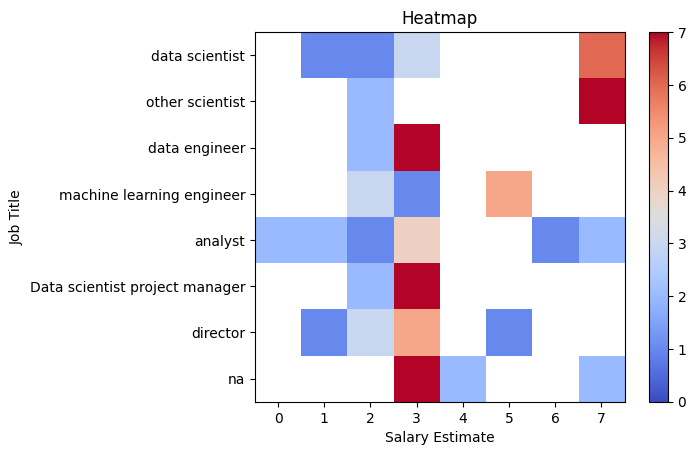

In [52]:
# Chart 2: A bar chart composed of a ternary relationship between occupation name, salary, and frequency of occurrences
#Note that the heat map created here uses salary and job name as the coordinate system, and the number of occurrences as the temperature value.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

num = 8

top_Salary = grouped_data.groupby('Salary Estimate')['count'].sum().nlargest(num).index
filtered_data = grouped_data[grouped_data['Salary Estimate'].isin(top_Salary)]
top_job = filtered_data.groupby('job_title_sim')['count'].sum().nlargest(num).index
job_name = np.array(filtered_data.groupby('job_title_sim')['count'].sum().nlargest(num).index)
new_data = filtered_data[filtered_data['job_title_sim'].isin(top_job)]

matrix = new_data.pivot(index='Salary Estimate', columns='job_title_sim', values='count')

plt.imshow(matrix, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=7)
plt.colorbar()
plt.xlabel('Salary Estimate')
plt.ylabel('Job Title')
plt.yticks(np.arange(len(job_name)), job_name)
plt.title('Heatmap')
plt.show()
